<a href="https://colab.research.google.com/github/IanaMary/exercicios/blob/master/classificadorLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**RELATÓRIO**
```
PARÂMETROS INICIAIS

pesos: [0.9, 0.1]
bias: 0.7
limiar: 1.5
Taxa Aprendizado: 5e-06
ACURÁCIA DO TREINO: 0.9714285714285714

PARÂMETROS AJUSTADOS

pesos: [0.9019758818827608, 0.10139918563001177]
bias: 0.7
limiar: 1.5
Taxa Aprendizado: 5e-06
ACURÁCIA DO TESTE: 0.5271428571428571
```

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
def gerarDF():
  url = '/content/drive/My Drive/dogs_cats.csv'
  df = pd.read_csv(url)
  df.head()

  df.loc[df['classe'] == 'cachorro', 'classe'] = 1
  df.loc[df['classe'] == 'gato', 'classe'] = 0
  df['classe'] = df['classe'].astype(int)
  df = df.drop_duplicates()
  df = df.dropna()

  return df

In [ ]:
def informacoesDF(df):
  print(df.dtypes)
  print(df.head())

  print('maior comprimento ', df['comprimento'].max())
  print('menor comprimento ', df['comprimento'].min())
  print('maior peso ', df['peso'].max())
  print('menor peso ', df['peso'].min())

In [ ]:
def gerarGrafico(dado, label):

  fig, ax = plt.subplots()
  scatter = ax.scatter(dado['comprimento'], dado['peso'], c=label['classe'], cmap='viridis', edgecolor='k')
  plt.colorbar(scatter, ax=ax, label='Classe')
  ax.set_xlabel('Comprimento')
  ax.set_ylabel('Peso')
  plt.show()

In [ ]:
def gerarGraficoComLinha(dado, label, wx, wy, wb, titulo):

  fig, ax = plt.subplots()
  scatter = ax.scatter(dado['comprimento'], dado['peso'], c=label['classe'], cmap='viridis', edgecolor='k')
  plt.colorbar(scatter, ax=ax, label='Classe')
  ax.set_xlabel('Comprimento')
  ax.set_ylabel('Peso')

  # Definir os limites dos dados
  x_min, x_max = 0, 1
  y_min, y_max = 0, 1


  ########################### y = ax + b
  # x_values = np.array(dado['comprimento'])
  x_values = np.array([x_min, x_max])
  x_values = np.clip(x_values, x_min, x_max)
  a = (wx/wy)
  b = (-wb/wy)
  y_values = np.dot(a, x_values) + b
   ###########################

  ###########################

  # # Criar dois pontos para a reta dentro dos limites dos dados
  # x_values = np.array([x_min, x_max])
  # y_values = (wx / wy) * x_values - (wb / wy)

  ###########################

  y_values = np.clip(y_values, y_min, y_max)

  ax.plot(x_values, y_values, color='red', linestyle='--', marker='o', label='Reta do Classificador')

  ax.set_title(titulo)

  plt.show()

In [ ]:
def classficador(dado, label, wx, wy, wb, taxaAprendizado, limiar):

  tam = len(label)

  x = dado['comprimento'].values
  y = dado['peso'].values
  labelNum = label['classe'].values

  saida = []
  erro = 0

  saida = []

  for i in range(tam):
    s = wx*x[i] + wy*y[i] + wb
    y1 = 1 if s >= limiar else 0
    erro = abs(labelNum[i] - y1)
    wx = wx + taxaAprendizado*erro*x[i]
    wy = wy + taxaAprendizado*erro*y[i]
    saida.append(erro)

  accuracy = accuracy_score(labelNum, saida)
  print(f"ACURÁCIA DO TREINO: {accuracy}")

  return wx, wy, wb, limiar

In [ ]:
def testarClassificador(dado, label, wx, wy, wb, limiar):

  tam = len(dado)
  saida = []
  x = dado['comprimento'].values
  y = dado['peso'].values
  labelNum = label['classe'].values

  for i in range(tam):
    s = wx*x[i] + wy*y[i] + wb
    y1 = 1 if s >= limiar else 0
    saida.append(y1)

  accuracy = accuracy_score(labelNum, saida)
  print(f"ACURÁCIA DO TESTE: {accuracy}")

      Unnamed: 0  comprimento        peso  classe
0              0    45.231415  431.548671       1
1              1    38.003753  517.870914       0
2              2    53.608592  444.025762       1
3              3    39.315731  524.066579       0
4              4    45.581301  450.552000       1
...          ...          ...         ...     ...
1995        1995    37.590457  587.274926       0
1996        1996    43.818870  416.846089       1
1997        1997    36.876470  483.215531       0
1998        1998    49.415613  514.637485       1
1999        1999    37.640400  548.746906       0

[2000 rows x 4 columns]
4000 2000


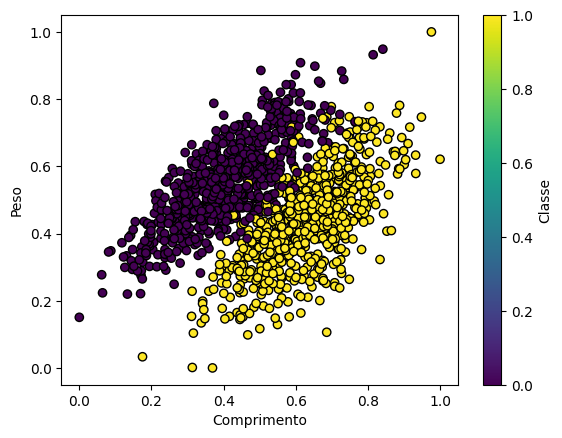

PARÂMETROS INICIAIS 

pesos: (0.9, 0.1)
bias: 0.7
limiar: 1.5
Taxa Aprendizado: 5e-06
ACURÁCIA DO TREINO: 0.9735714285714285


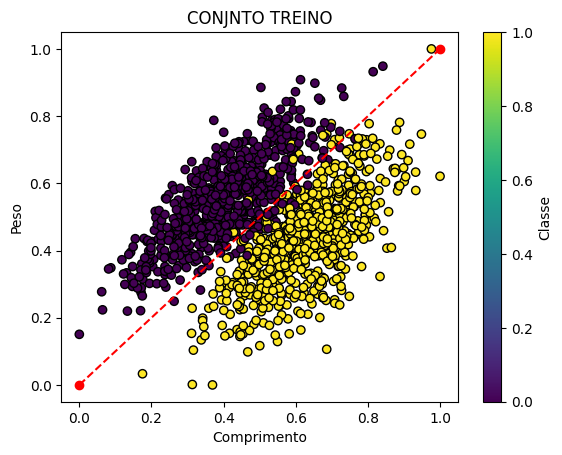

PARÂMETROS AJUSTADOS 

pesos: (0.9020548312549, 0.1014159642394676)
bias: 0.7
limiar: 1.5
Taxa Aprendizado: 5e-06
ACURÁCIA DO TESTE: 0.5235714285714286


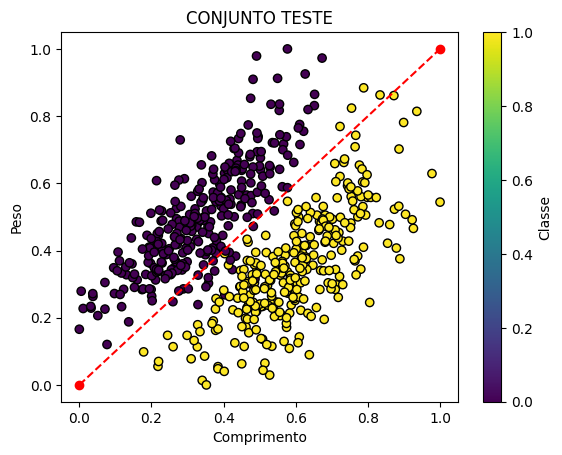

In [ ]:
# CRIAR DF

df = gerarDF()

# SEPARAÇÃO DE DADO E LABEL

data = df[['comprimento', 'peso']]
label = df[['classe']]

print(df)
print(data.size, label.size)

# SEPARAÇÃO CONJUNTO TESTE E TREINO
xTreino, xTeste, yTreino, yTeste = train_test_split(data, label, test_size=0.3, stratify=label)

# FORMALIZAR DADOS DE TREINO
scaler = MinMaxScaler(feature_range=(0, 1))
xTreino = pd.DataFrame(scaler.fit_transform(xTreino), columns=xTreino.columns, index=xTreino.index)

# VER DADOS DO CONJUNTO DE TREINO
gerarGrafico(xTreino, yTreino)

# CLASSIFICADOR
limiar = 1.5
taxaAprendizado = 0.000005
wx = 0.9
wy = 0.1
wb = 0.7

print("PARÂMETROS INICIAIS \n")
print(f"pesos: {wx, wy}")
print(f"bias: {wb}")
print(f"limiar: {limiar}")
print(f"Taxa Aprendizado: {taxaAprendizado}")

wx, wy, wb, limiar = classficador(xTreino, yTreino, wx, wy, wb, taxaAprendizado, limiar)
gerarGraficoComLinha(xTreino, yTreino, wx, wy, wb, 'CONJNTO TREINO')

print("PARÂMETROS AJUSTADOS \n")
print(f"pesos: {wx, wy}")
print(f"bias: {wb}")
print(f"limiar: {limiar}")
print(f"Taxa Aprendizado: {taxaAprendizado}")

# FORMALIZAR DADOS DE TESTE
xTeste = pd.DataFrame(scaler.fit_transform(xTeste), columns=xTeste.columns, index=xTeste.index)

# APLICANDO OS RESULTADOS DO CLASSIFCADOR SOBRE O CONJUNTO DE TESTE
testarClassificador(xTreino, yTreino, wx, wy, wb, limiar)
gerarGraficoComLinha(xTeste, yTeste, wx, wy, wb, 'CONJUNTO TESTE')

